# Functions

In [25]:
def fit_predict(model):
# Essa função faz com o que o modelo treine e faça a predição.
    model.fit( X )
    labels = model.predict( X )
        # Metric
    ss = mt.silhouette_score( X, labels )
    n_clusters = len(np.unique(labels))

    return ss, n_clusters

In [20]:
def dataframe():
# Essa função mostra o dataframe
    data = [['KMeans', n_clusters, ss], ['Affinity Propagation', n_clusters_ap, ss_ap]]
    df = pd.DataFrame(data, columns=['Model','Número de Clusters', 'Silhouette Score'])
    return df

# Imports

In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from IPython.display import display
import warnings

warnings.filterwarnings("ignore")

In [6]:
X = pd.read_csv("X_dataset.csv")

# Affinity Propagation

In [29]:
values

array([-50.])

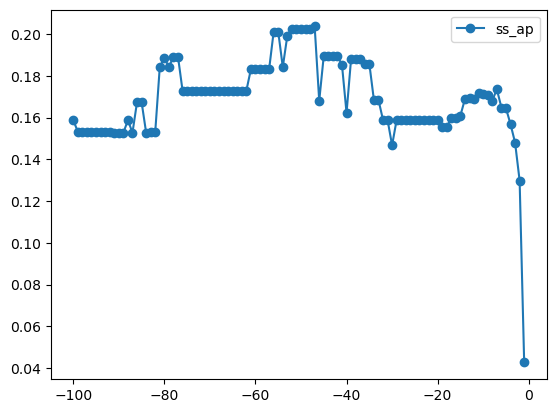

In [40]:
## Loop melhor parâmetro
values = np.linspace(-100, -1, 100)


val_scores = []
val_scores1 = []
for i in values:
    model = AffinityPropagation( preference= i )
    ss_ap, n_clusters_ap = fit_predict(model)
    val_scores.append(ss_ap)
    val_scores1.append(n_clusters_ap)
plt.plot( values, val_scores, '-o', label='ss_ap' )

plt.legend()
plt.show()

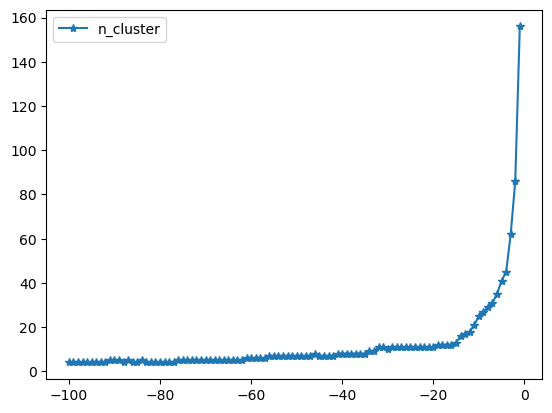

In [41]:
plt.plot( values, val_scores1, '-*', label='n_cluster' )
plt.legend()
plt.show()

In [56]:
model = AffinityPropagation( preference= -47 )
ss_ap, n_clusters_ap = fit_predict(model)
print(f"Average Silhouette Score: {round(ss_ap,3)} and Nº Clusters: {n_clusters_ap}")

Average Silhouette Score: 0.204 and Nº Clusters: 7


# K-Means

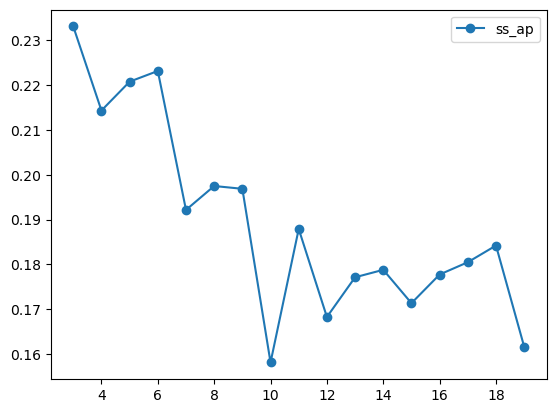

In [51]:
## Loop melhor parâmetro
values = [i for i in range( 3, 20 )]
val_scores = []
val_scores1 = []

for i in values:
    model = KMeans( n_clusters = i )
    ss_ap, n_clusters_ap = fit_predict(model)
    val_scores.append(ss_ap)
    val_scores1.append(n_clusters_ap)

plt.plot( values, val_scores, '-o', label='ss_ap' )
plt.legend()
plt.show()

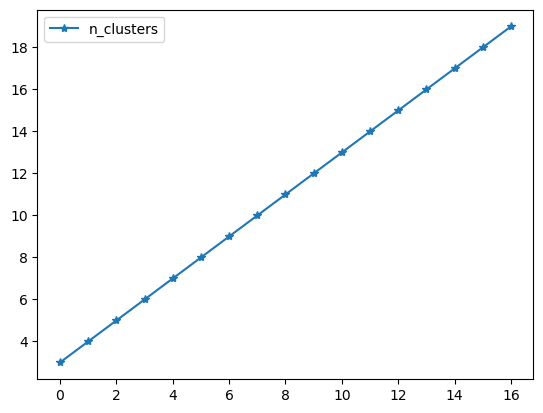

In [46]:
plt.plot( val_scores1, '-*', label='n_clusters' )
plt.legend()
plt.show()

In [54]:
model = KMeans( n_clusters = 3 )
ss, n_clusters  = fit_predict(model)
print(f"Average Silhouette Score: {round(ss,3)} and Nº Clusters: {n_clusters}")

Average Silhouette Score: 0.233 and Nº Clusters: 3


In [57]:
df = dataframe()
display(df)

,Model,Número de Clusters,Silhouette Score
0,KMeans,3,0.232959
1,Affinity Propagation,7,0.203658
